In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy 

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()
inspector = inspect(engine)

In [17]:
# get the name of the tables
table_names = inspector.get_table_names()
table_names

['measurement', 'station']

In [18]:
# get the name of the columns in each table
# Week10 day 2 activity 7 
for table in table_names:
    columns = inspector.get_columns(table)
    print(table)
    display(pd.DataFrame(columns))
    print()

measurement


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,date,TEXT,True,None,auto,0
3,prcp,FLOAT,True,None,auto,0
4,tobs,FLOAT,True,None,auto,0



station


,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
query = """ select
        max(date)
    from
        measurement;
"""
engine.execute(query).fetchall()

[('2017-08-23',)]

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date

query2 = """ select
        *
    from
        measurement
    where
        date between '2016-08-23' and '2017-08-23'
    order by
        date;
"""
engine.execute(query2).fetchall()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.read_sql(query2, conn)
df



,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,5091,USC00513117,2016-08-23,0.15,76.0
2,7331,USC00514830,2016-08-23,0.05,80.0
3,8825,USC00517948,2016-08-23,NaN,80.0
4,11851,USC00519523,2016-08-23,0.02,80.0
...,...,...,...,...,...
2225,19549,USC00516128,2017-08-22,0.50,76.0
2226,2724,USC00519397,2017-08-23,0.00,81.0
2227,7635,USC00514830,2017-08-23,0.00,82.0
2228,12187,USC00519523,2017-08-23,0.08,82.0


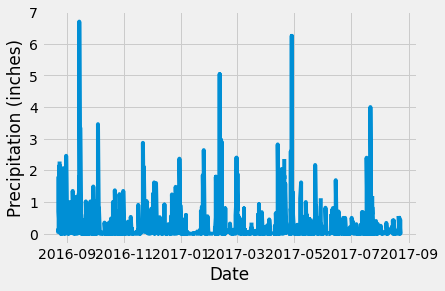

In [39]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(df['date'], df['prcp'])
plt.ylabel(ylabel = 'Precipitation (inches)')
plt.xlabel(xlabel = 'Date')
plt.show()

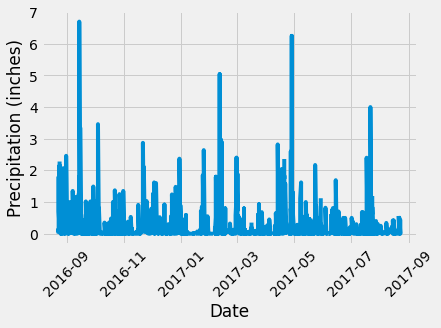

In [37]:
# convert 'date' to datetime
df["date"] = pd.to_datetime(df["date"])

# replot
plt.plot(df['date'], df['prcp'])
plt.ylabel(ylabel = 'Precipitation (inches)')
plt.xlabel(xlabel = 'Date')
plt.xticks(rotation = 45)
plt.show()

In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number stations in the dataset
query3 = """ select
        count(distinct station)
    from
        measurement;
"""
engine.execute(query3).fetchall()

[(9,)]

In [56]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
query4 = """ select
        station,
        count(*) as activity
    from
        measurement
    group by
        station
    order by
        activity desc;
"""
engine.execute(query4).fetchall()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [57]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query5 = """ select
        min(tobs),
        max(tobs),
        avg(tobs)
    from
        measurement
    where
        station == 'USC00519281';
"""
engine.execute(query5).fetchall()

[(54.0, 85.0, 71.66378066378067)]

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
query6 = """ select
        *
    from
        measurement
    where
        station == 'USC00519281' and date between '2016-08-23' and '2017-08-23'  
    order by
        date;
"""
engine.execute(query6).fetchall()

# Save the query results as a Pandas DataFrame and set the index to the date column
df2 = pd.read_sql(query6, conn)
df2



,id,station,date,prcp,tobs
0,14608,USC00519281,2016-08-23,1.79,77.0
1,14609,USC00519281,2016-08-24,2.15,77.0
2,14610,USC00519281,2016-08-25,0.06,80.0
3,14611,USC00519281,2016-08-26,0.01,80.0
4,14612,USC00519281,2016-08-27,0.12,75.0
...,...,...,...,...,...
347,14955,USC00519281,2017-08-14,0.00,77.0
348,14956,USC00519281,2017-08-15,0.32,77.0
349,14957,USC00519281,2017-08-16,0.12,76.0
350,14958,USC00519281,2017-08-17,0.01,76.0


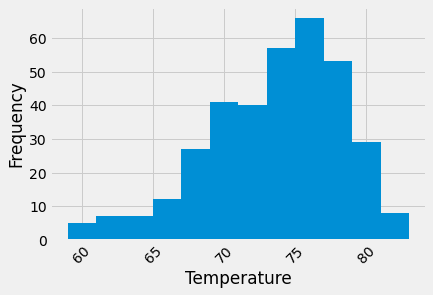

In [71]:
# and plot the results as a histogram
# convert 'date' to datetime
df2["date"] = pd.to_datetime(df2["date"])

# replot
plt.hist(df2['tobs'], bins = 12)
plt.ylabel(ylabel = 'Frequency')
plt.xlabel(xlabel = 'Temperature')
plt.xticks(rotation = 45)
plt.show()

# Close session

In [ ]:
# Close Session
session.close()